##ASSIGNMENT 4
#PART - A

In [13]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage import color

#https://images.app.goo.gl/s4mwKkXPq6h1KKay8
#https://images.app.goo.gl/v17EFAyjC84FqmAG8

#Download the images from the above links and then apply the convolution filters(manually)
#a) apply prewitt filter
#b) apply sobel filter
#then output the resulting image

C:\Users\ayush\AppData\Local\Temp\ipykernel_7312\1726063134.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


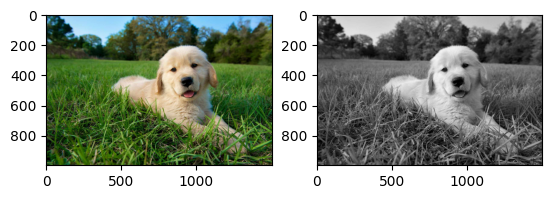

In [14]:
image_file = "GettyImages-185743593-2000-507c6c8883a44851885ea4fbc10a2c9e.jpg"

input_image = imread(image_file)
grayscale_image = color.rgb2gray(input_image)

fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

# Source - https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python

C:\Users\ayush\AppData\Local\Temp\ipykernel_7312\4084721559.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


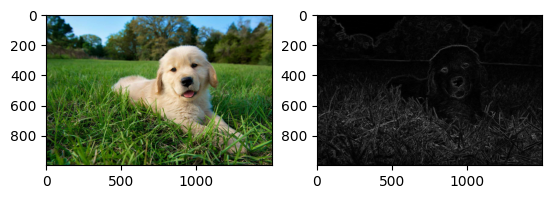

In [15]:
# Prewitt Filter.

Gx = np.array([[-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0], [-1.0, 0.0, 1.0]])
Gy = np.array([[-1.0, -1.0, -1.0], [0.0, 0.0, 0.0], [1.0, 1.0, 1.0]])

[rows, columns] = np.shape(grayscale_image) 
prewitt_filtered_image = np.zeros(shape=(rows, columns)) 

for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3]))  
        prewitt_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  

fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(prewitt_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

# Source - # https://github.com/adamiao/sobel-filter-tutorial/blob/master/sobel_from_scratch.py

C:\Users\ayush\AppData\Local\Temp\ipykernel_7312\2940685725.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig1.show()


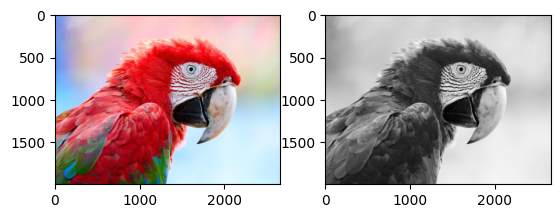

In [16]:
image_file = "shouts-animals-watch-baby-hemingway.webp"

input_image = imread(image_file)  
grayscale_image = color.rgb2gray(input_image)

fig1 = plt.figure(1)
ax1, ax2 = fig1.add_subplot(121), fig1.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(grayscale_image, cmap=plt.get_cmap('gray'))
fig1.show()

C:\Users\ayush\AppData\Local\Temp\ipykernel_7312\539364812.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig2.show()


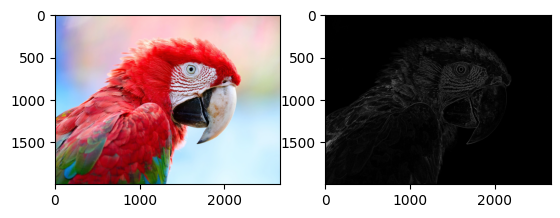

In [17]:
# Sobel Filter

Gx = np.array([[1.0, 0.0, -1.0], [2.0, 0.0, -2.0], [1.0, 0.0, -1.0]])
Gy = np.array([[1.0, 2.0, 1.0], [0.0, 0.0, 0.0], [-1.0, -2.0, -1.0]])

[rows, columns] = np.shape(grayscale_image)  
sobel_filtered_image = np.zeros(shape=(rows, columns))  

for i in range(rows - 2):
    for j in range(columns - 2):
        gx = np.sum(np.multiply(Gx, grayscale_image[i:i + 3, j:j + 3]))  
        gy = np.sum(np.multiply(Gy, grayscale_image[i:i + 3, j:j + 3])) 
        sobel_filtered_image[i + 1, j + 1] = np.sqrt(gx ** 2 + gy ** 2)  

fig2 = plt.figure(2)
ax1, ax2 = fig2.add_subplot(121), fig2.add_subplot(122)
ax1.imshow(input_image)
ax2.imshow(sobel_filtered_image, cmap=plt.get_cmap('gray'))
fig2.show()

Now let's implement a model with just a single convolution layer, given X(input), Y(output) and K(kernel). Y is the output of the cross-correlation operation of K on X. You need to build a model to learn that kernel K.(try to print the kernel at each epoch)



### 3.1 - Zero-Padding

Zero-padding adds zeros around the border of an image:


In [18]:
X = np.ones((6, 8), dtype=np.float32)
X[:, 2:6] = 0
print(X)

[[1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]
 [1. 1. 0. 0. 0. 0. 1. 1.]]


In [19]:
#Complete the following function corr2d(X, K), which implements the cross correlation operation for matrix X and kernel K, both are two dimensional numpy arrays (height x width). The function should return a 2 dimensional numpy array which is the result of cross correlation operation between X and K.


In [20]:
def corr2d(X: np.array, K: np.array) -> np.array:
    h_X, w_X = X.shape
    h_K, w_K = K.shape
    
    h_Y = h_X - h_K + 1        # input - kernel + 1
    w_Y = w_X - w_K + 1
    
    Y = np.zeros((h_Y, w_Y))

    for i in range(h_Y):
        for j in range(w_Y):
            Y[i][j] = np.sum(X[i:i+h_K, j:j+w_K] * K)

    return Y

# Source - https://classic.d2l.ai/chapter_convolutional-neural-networks/conv-layer.html

In [21]:
K = np.array([[1.0, -1.0]], dtype=np.float32) # kernel, you need to learn this using a model
Y = corr2d(X, K)
print(Y)

[[ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]
 [ 0.  1.  0.  0.  0. -1.  0.]]


In [22]:
X = X.reshape((1, 1, 6, 8)) # this will be the input to the model
Y = Y.reshape((1, 1, 6, 7)) # this is the output, to be used while calculation loss
lr = 3e-2 # use this learning rate

In [23]:
#use the above corr2d in model

class model:
    def __init__(self,lr,epochs):
        #Write your code here
        self.lr = lr
        self.epochs = epochs 
        
    # Source - https://www.upgrad.com/tutorials/software-engineering/python-tutorial/__init__-in-python/

    def fit(self,X,Y):
      #Write your code here
      self.X = X
      self.Y = Y
      
      return
    
      

In [24]:
gd = model(3e-2,100)
gd.fit(X,Y)

In [25]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image,
    as illustrated in Figure 1.

    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions

    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """

    # YOUR CODE STARTS HERE
    X_pad = np.pad(array = X, pad_width = ((0,0), (pad,pad), (pad,pad), (0,0)), mode = 'constant', constant_values = 0)

    # YOUR CODE ENDS HERE

    return X_pad

# Source - https://www.kaggle.com/code/jsrshivam/convolve-from-scratch

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


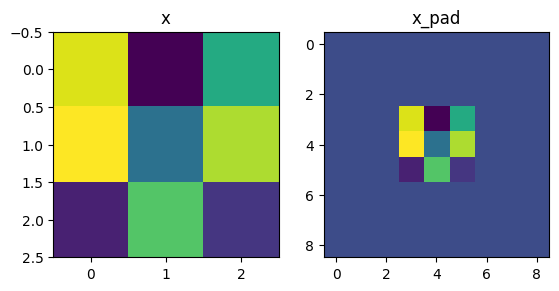

In [26]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 3)
print ("x.shape =\n", x.shape)
print ("x_pad.shape =\n", x_pad.shape)
print ("x[1,1] =\n", x[1, 1])
print ("x_pad[1,1] =\n", x_pad[1, 1])

fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0, :, :, 0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0, :, :, 0])

In [27]:

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation
    of the previous layer.

    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)

    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """
    conv = np.multiply(a_slice_prev, W)
    Z = np.sum(conv) + b
    Z = np.float64(Z)

    # YOUR CODE ENDS HERE

    return Z

In [28]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

assert (type(Z) == np.float64), "You must cast the output to numpy float 64"
assert np.isclose(Z, -6.999089450680221), "Wrong value"

Z = -6.999089450680221


C:\Users\ayush\AppData\Local\Temp\ipykernel_7312\284866780.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = np.float64(Z)



### 3.3 - Convolutional Neural Networks - Forward Pass

In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

### Exercise 3 -  conv_forward
Implement the function below to convolve the filters `W` on an input activation `A_prev`.  
This function takes the following inputs:
* `A_prev`, the activations output by the previous layer (for a batch of m inputs);
* Weights are denoted by `W`.  The filter window size is `f` by `f`.
* The bias vector is `b`, where each filter has its own (single) bias.

You also have access to the hyperparameters dictionary, which contains the stride and the padding.

In [29]:
a_slice_prev.shape

(4, 4, 3)

In [30]:

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function

    Arguments:
    A_prev -- output activations of the previous layer,
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"

    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    """

    stride = hparameters["stride"]
    pad = hparameters["pad"]
 
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
   
    f, f, n_C_prev, n_C = W.shape
  
    n_H = int((n_H_prev - f + 2*pad)/stride) + 1
    n_W = int((n_W_prev - f + 2*pad)/stride) + 1
  
    Z = np.zeros((m, n_H, n_W, n_C))
    
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):
      for h in range(n_H):
        for w in range(n_W):
          for c in range(n_C):
            w_start = w * stride
            w_end = w_start + f 
            h_start = h * stride
            h_end = h_start + f
        
            Z[i,h,w,c] = conv_single_step(A_prev_pad[i, h_start:h_end, w_start:w_end, :], W[:,:,:,c], b[:,:,:,c])

    # YOUR CODE ENDS HERE

    return Z

In [31]:
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4)
W = np.random.randn(3, 3, 4, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 1,
               "stride": 2}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
z_mean = np.mean(Z)
z_0_2_1 = Z[0, 2, 1]
# cache_0_1_2_3 = cache_conv[0][1][2][3]
print("Z's mean =\n", z_mean)
print("Z[0,2,1] =\n", z_0_2_1)
# print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)

# cache_conv is also 3 dimensional as Z. [0][1][2][3] is not a valid index for it.

Z's mean =
 0.07188981915685806
Z[0,2,1] =
 3.4085979527632695


C:\Users\ayush\AppData\Local\Temp\ipykernel_7312\284866780.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z = np.float64(Z)



## 4 - Pooling Layer

These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size $f$. This specifies the height and width of the $f \times f$ window you would compute a *max* or *average* over.

<a name='4-1'></a>
### 4.1 - Forward Pooling
Now, you are going to implement MAX-POOL and AVG-POOL, in the same function.

<a name='ex-4'></a>
### Exercise 4 - pool_forward

Implement the forward pass of the pooling layer. Follow the hints in the comments below.





In [32]:
def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer

    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")

    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    """

    # Retrieve dimensions from the input shape

    # Retrieve hyperparameters from "hparameters"

    # Define the dimensions of the output

    # Initialize output matrix A

    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape

    f = hparameters["f"]  
    stride = hparameters["stride"]

    h_out = int(((n_H_prev - f)/stride) + 1)
    w_out = int(((n_W_prev -f)/stride) + 1)

    A = np.zeros((m, h_out, w_out, n_C_prev))
    
    for i in range(m):
        for c in range(n_C_prev):
            for h in range(h_out):
                for w in range(w_out):
                    w_start = w * stride
                    w_end = w_start + f
                    h_start = h * stride
                    h_end = h_start + f
                    if(mode=="max"):
                        A[i, h, w, c] = np.max(A_prev[i,h_start:h_end, w_start:w_end, c])
                    elif(mode=="average"):
                        A[i, h, w, c] = np.mean(A_prev[i,h_start:h_end, w_start:w_end, c])
                        
    print(A.shape)
    assert A.shape == (m, h_out, w_out, n_C_prev)

    # YOUR CODE ENDS HERE

    return A

In [33]:
# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 1, "f": 3}

A= pool_forward(A_prev, hparameters, mode = "max")
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])
A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1, 1] =\n", A[1, 1])


(2, 3, 3, 3)
mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
(2, 3, 3, 3)
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]


**Expected output**

```
mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]

mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]
```

In [34]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A= pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A= pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

(2, 2, 2, 3)
mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

(2, 2, 2, 3)
mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


**Expected output**
```
mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]
  ```